In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
products = pd.read_csv("Food-Data-clean.csv",sep=',',low_memory=False, encoding='Latin-1')
products = products.convert_objects(convert_numeric=True)

C:\Users\Utilisateur\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [3]:
products.sample(4)

,code,url,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
226184,3544980009914,http://world-fr.openfoodfacts.org/produit/3544...,NaN,2013-09-23T17:45:21Z,2016-10-07T12:46:21Z,NaN,NaN,NaN,France,en:france,...,5.71,1.5,NaN,0.58166,0.000000,0.0000,0.035,0.00101,10.0,9.0
64488,0054467050368,http://world-fr.openfoodfacts.org/produit/0054...,NaN,2017-03-09T14:08:10Z,2017-03-09T14:08:10Z,NaN,NaN,NaN,US,en:united-states,...,64.29,10.7,7.14,0.00000,0.000000,0.0000,0.071,0.00643,13.0,13.0
108250,0099482447625,http://world-fr.openfoodfacts.org/produit/0099...,NaN,2017-03-09T12:36:56Z,2017-03-09T12:36:57Z,NaN,NaN,NaN,US,en:united-states,...,23.53,0.0,0.00,2.39014,0.000176,0.0141,0.000,0.00000,16.0,16.0
51259,0041668104068,http://world-fr.openfoodfacts.org/produit/0041...,NaN,2017-03-10T08:14:13Z,2017-03-10T08:14:13Z,NaN,NaN,NaN,US,en:united-states,...,2.50,7.5,12.50,0.00000,0.000000,0.0000,0.050,0.00450,10.0,10.0


In [4]:
products.shape


(295009, 39)

In [5]:
# 3.1 EXPLORARION DES DONNEES - CORRELATION

Populating the interactive namespace from numpy and matplotlib


C:\Users\Utilisateur\AppData\Local\Continuum\anaconda3\lib\site-packages\biokit\viz\linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)


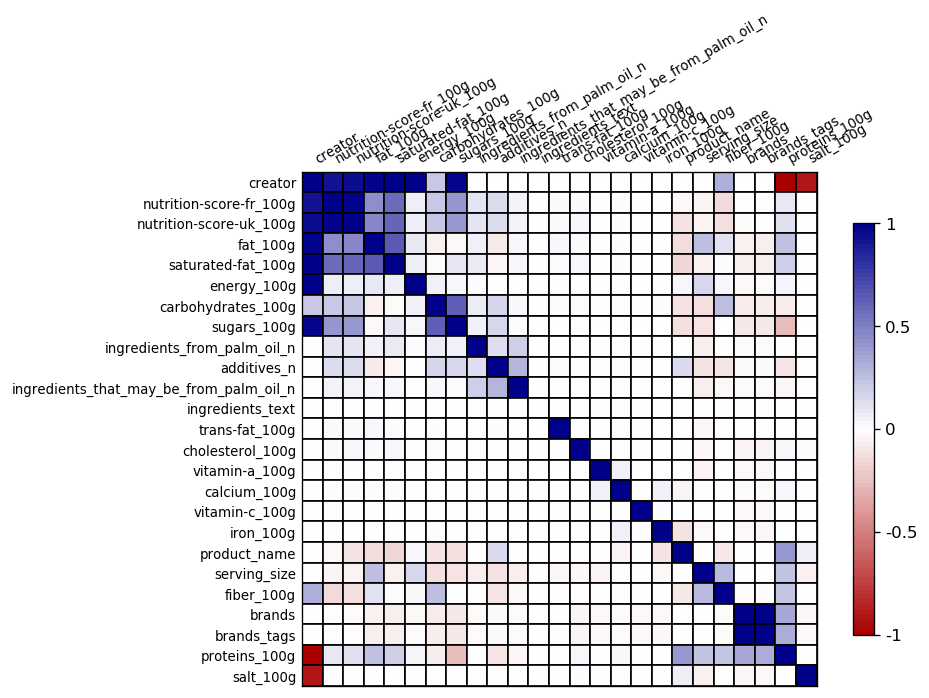

In [6]:
# 3.1.1 EXPLORARION DES DONNEES - CORRELATION AVEC UNE MATRICE DE CORRELATION

from biokit.viz import corrplot
%pylab inline
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (8,6)

c = corrplot.Corrplot(products.corr())
c.plot(shrink= .9, grid=False, fontsize=8,method='color') #method: ellipse', 'square', 'rectangle',
    #'color', 'text', 'circle',  'number', 'pie'

plt.show()

In [7]:
# 3.1.2 EXPLORARION DES DONNEES - CORRELATION AVEC TOUS LES COEFFICIENTS DE CORRELATION PAR RAPPORT A LA VARIABLE D'INTERET

correlation = products.corr()["nutrition-score-fr_100g"]
correlation.sort_values()


fiber_100g                                -0.141245
serving_size                              -0.040079
product_name                              -0.030643
brands                                    -0.013230
brands_tags                               -0.011419
vitamin-c_100g                            -0.001077
iron_100g                                 -0.000643
vitamin-a_100g                             0.000064
salt_100g                                  0.007290
calcium_100g                               0.011291
trans-fat_100g                             0.017531
cholesterol_100g                           0.023224
ingredients_that_may_be_from_palm_oil_n    0.048381
energy_100g                                0.066638
proteins_100g                              0.086551
ingredients_from_palm_oil_n                0.102230
additives_n                                0.137116
carbohydrates_100g                         0.215397
sugars_100g                                0.409622
fat_100g    

In [8]:
# 3.1.3 EXPLORARION DES DONNEES - CREATION D'UN DATAFRAME AVEC LES VARIABLES INTERESSANTES

new_liste=["nutrition-score-fr_100g","fat_100g", "energy_100g", "proteins_100g", "sugars_100g", "salt_100g", "fiber_100g"]
print(new_liste)


['nutrition-score-fr_100g', 'fat_100g', 'energy_100g', 'proteins_100g', 'sugars_100g', 'salt_100g', 'fiber_100g']


In [9]:
df3=pd.DataFrame(data=products, columns=new_liste)
df3=df3.dropna()
df3


,nutrition-score-fr_100g,fat_100g,energy_100g,proteins_100g,sugars_100g,salt_100g,fiber_100g
1,14.0,28.57,2243.00,3.570,14.29,0.00000,3.600
2,0.0,17.86,1941.00,17.860,17.86,0.63500,7.100
3,12.0,57.14,2540.00,17.860,3.57,1.22428,7.100
4,10.0,1.43,1552.00,8.570,5.71,0.58166,5.700
5,10.0,18.27,1933.00,13.460,11.54,0.58166,7.700
6,10.0,5.00,1490.00,8.890,5.71,0.58166,1.500
7,7.0,18.75,1833.00,14.060,15.62,0.13970,9.400
8,10.0,37.50,2406.00,5.000,42.50,0.58166,7.500
10,10.0,1.04,1393.00,22.920,5.71,0.58166,12.500
11,10.0,1.75,1540.00,14.040,5.71,0.58166,1.800


In [10]:
# 3.2 EXPLORARION DES DONNEES - ANALYSE UNIVARIEE

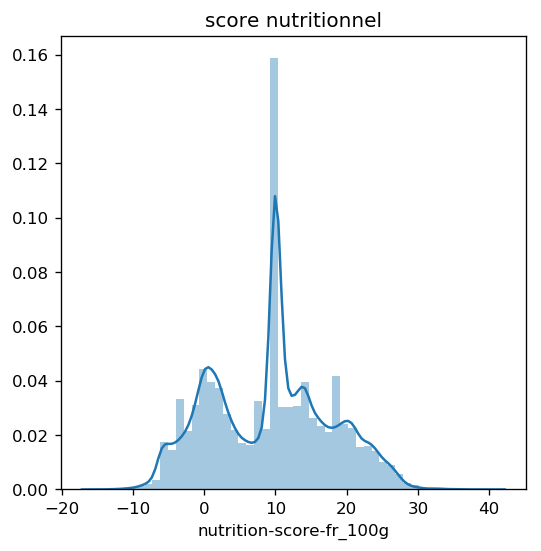

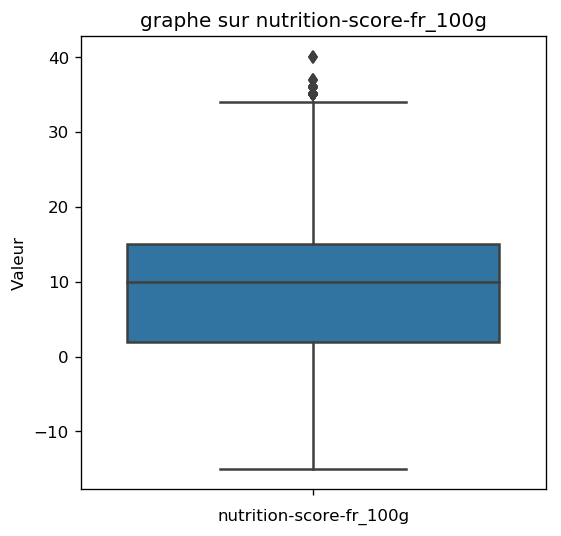

In [11]:
import seaborn as sns

# plot univariate histograms
fig = plt.figure(figsize=(17,5)) 
fig.add_subplot(131)
sns.distplot(df3["nutrition-score-fr_100g"])
plt.xlabel('nutrition-score-fr_100g')
plt.title('score nutritionnel')

# plot univariate boxplot
fig = plt.figure(figsize=(17,5)) 
fig.add_subplot(131)
sns.boxplot(y=df3["nutrition-score-fr_100g"])
plt.xlabel("nutrition-score-fr_100g")
plt.ylabel("Valeur")
plt.title('graphe sur {}'.format('nutrition-score-fr_100g'))           
plt.show()


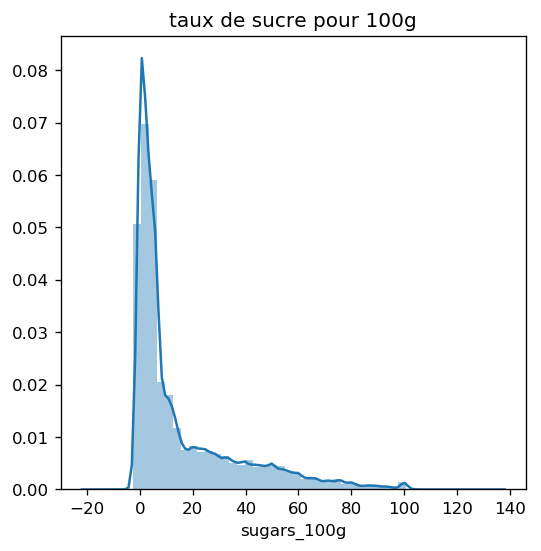

In [12]:
import seaborn as sns

# plot univariate histograms
fig = plt.figure(figsize=(17,5)) 
fig.add_subplot(131)
sns.distplot(df3["sugars_100g"])
plt.xlabel('sugars_100g');
plt.title('taux de sucre pour 100g');

In [13]:
# 3.3 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE

Text(0.5,1,'Scatterplot for the Association between score and surgar')

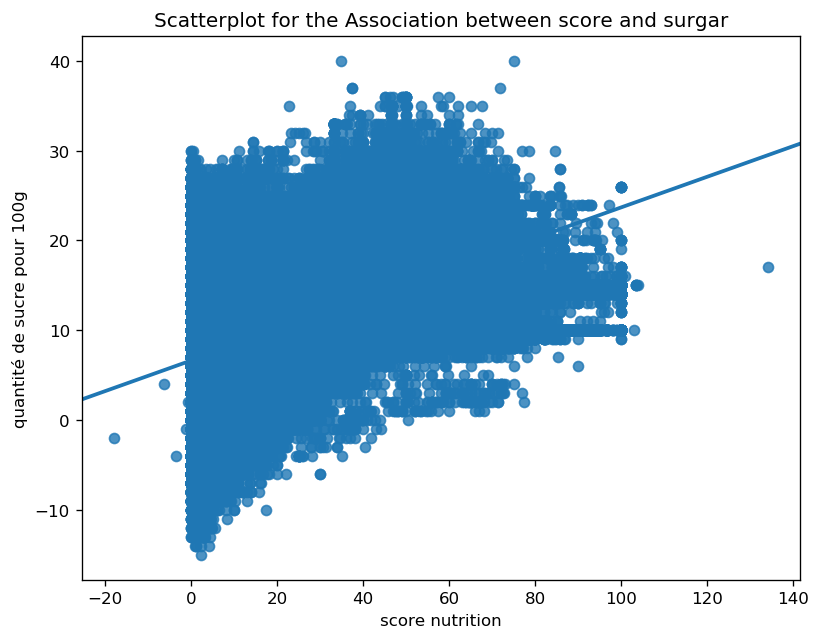

In [14]:
# 3.3.1 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE avec bivariate regplot

import seaborn as sns

fig = plt.figure(figsize=(17,6))

fig.add_subplot(121)
sns.regplot(x="sugars_100g", y="nutrition-score-fr_100g", fit_reg=True, data=df3)
plt.xlabel('score nutrition')
plt.ylabel('quantité de sucre pour 100g')
plt.title('Scatterplot for the Association between score and surgar')


In [15]:
df3['nutrition-score-fr_100g_2']= df3['nutrition-score-fr_100g']//15


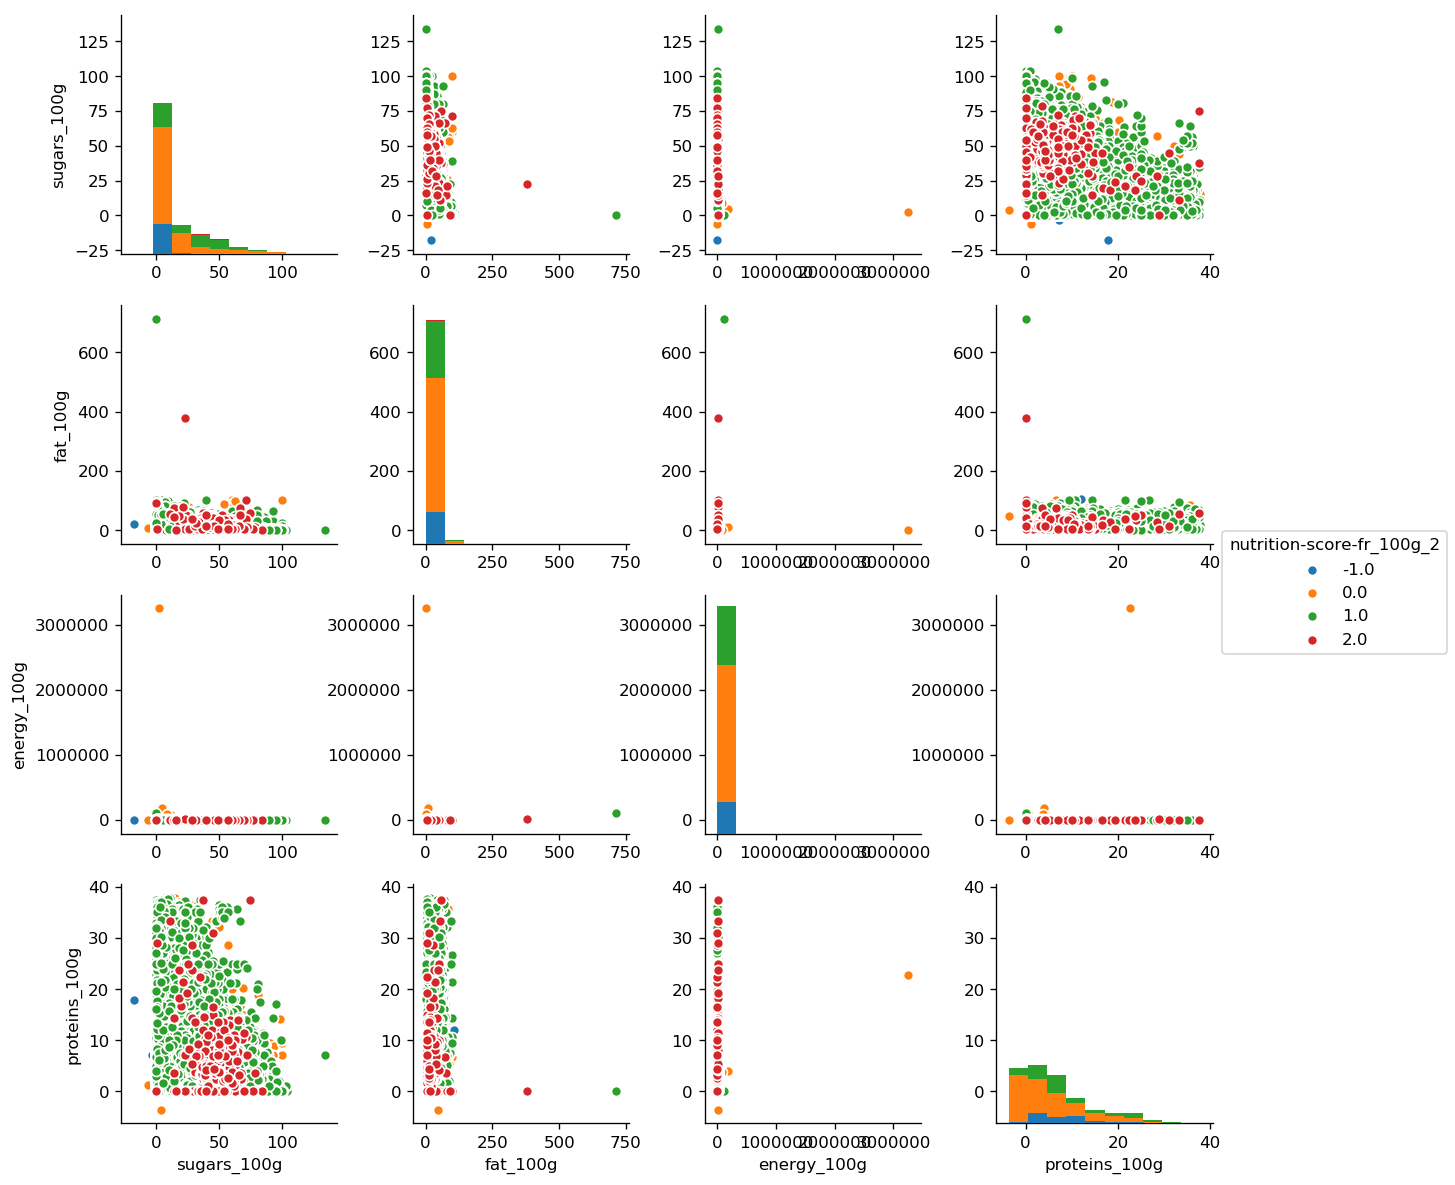

In [16]:
# 3.3.2 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE avec pairplot et clustering

import seaborn as sns
#bonne librairie de visualisation
sns.pairplot(df3, hue="nutrition-score-fr_100g_2", vars=["sugars_100g","fat_100g","energy_100g", "proteins_100g" ])


Score nutritionnel - 4 categories - quartiles
25%tile     69914
50%tile     84009
75%tile     44557
100%tile    59029
Name: scorequart, dtype: int64
       scorequart                 variable  value
0         75%tile  nutrition-score-fr_100g  14.00
1         25%tile  nutrition-score-fr_100g   0.00
2         75%tile  nutrition-score-fr_100g  12.00
3         50%tile  nutrition-score-fr_100g  10.00
4         50%tile  nutrition-score-fr_100g  10.00
5         50%tile  nutrition-score-fr_100g  10.00
6         50%tile  nutrition-score-fr_100g   7.00
7         50%tile  nutrition-score-fr_100g  10.00
8         50%tile  nutrition-score-fr_100g  10.00
9         50%tile  nutrition-score-fr_100g  10.00
10        75%tile  nutrition-score-fr_100g  12.00
11        50%tile  nutrition-score-fr_100g  10.00
12        50%tile  nutrition-score-fr_100g  10.00
13        25%tile  nutrition-score-fr_100g   0.00
14        25%tile  nutrition-score-fr_100g   0.00
15        50%tile  nutrition-score-fr_100g  10.00
1

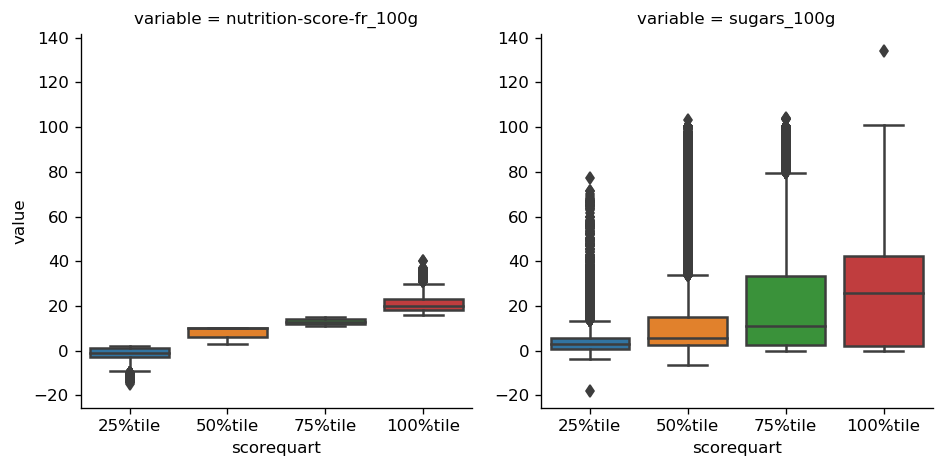

In [19]:
# 3.3.3 EXPLORARION DES DONNEES - ANALYSE MULTIVARIEE avec factorplot et quartile split

print('Score nutritionnel - 4 categories - quartiles')
df3['scorequart'] = pd.qcut(df3["nutrition-score-fr_100g"], 4,labels=["25%tile", "50%tile", "75%tile", "100%tile"])
print(df3['scorequart'].value_counts(sort=False, dropna=True))

df3.m = pd.melt(df3, id_vars=["scorequart"], value_vars=["nutrition-score-fr_100g", "sugars_100g"])
print(df3.m)

sns.factorplot(x='scorequart', y='value', col="variable", data=df3.m,kind="box", ci=None, order=['25%tile', '50%tile', '75%tile', '100%tile'])

In [20]:
# 3.4 EXPLORARION DES DONNEES - TEST DE SIGNIFICATIVITE (p-value)

In [21]:
import numpy as np
from scipy import stats

p_value = stats.pearsonr(products['nutrition-score-fr_100g'],products['sugars_100g'])
print(p_value)


(0.40962208288282403, 0.0)


In [22]:
# 3.5 EXPLORARION DES DONNEES - FEATURE ENGINEERING